자료출처 : https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko

### Over / Under Fitting
  - 일정 에포크 동안 훈련하면 검증 세트에서 모델 성능이 최고점에 도달
    - 그 이후 감소하기 시작  
      
  - OverFitting(과대적합)
    - 훈련세트가 아닌 테스트 세트에서 높은 성능을 보이는 모델
    - 과대적합 : 훈련세트의 성능은 좋으나 검증, 테스트 세트에서 성능이 낮아지는 현상  
      
    - 방지
      - 많은 훈련데이터를 사용
      - 규제(regularization) 기법을 사용 : 모델이 저장할 수 있는 정보의 양과 종류에 제약을 부과하는 방법
      
  - UnderFitting(과소적합)
    - 테스트 세트의 성능이 향상될 여지가 있을 때 발생
    - 원인
      - 모델이 너무 단순
      - 규제가 너무 많음
      - 충분히 훈련하지 않은 경우 : 네트워크가 훈련 세트에서 적절한 패턴을 학습하지 못한 경우
      

### 01. import

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.5.0


### 02. IMDB DataSet Download

In [3]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0    # results[i]의 특정 인덱스만 1로 설정합니다.
    return results

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\jjanh_000\program\conda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\jjanh_000\program\conda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecat

In [4]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

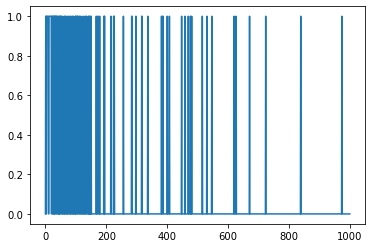

In [5]:
plt.plot(train_data[0])

### 03. 과대적합 예제
  - 모델의 규모를 축소 : 모델에 있는 학습 파라미터의 수를 감소
    - 모델 파라미터 : 층(layer)의 개수와 층의 유닛(unit) 개수에 의해 결정
    - 딥러닝에서는 모델의 학습 가능한 파라미터의 수를 모델의 '용량'이라고 말하기도 함
    - 많은 파라미터를가진 모델 : 더 많은 '기억용량'을 가짐
      - 훈련 샘플과 타깃 사이를 매핑으로 완벽히 학습할 수 있음 : 새로운 데이터에서는 예측 불가  
        
  - 중요한 점 : 딥러닝 모델이 훈련 세트에서는 학습이 잘되는 경향
    - 훈련의 목적 : 훈련데이터의 학습이 아니라 일반화라는 것

#### 기준 모델 만들기

In [6]:
baseline_model = keras.Sequential([
    # '.summary' 메서드 때문에 'input_shape' 필요
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Epoch 1/20
49/49 - 7s - loss: 0.5601 - accuracy: 0.7199 - binary_crossentropy: 0.5601 - val_loss: 0.4180 - val_accuracy: 0.8225 - val_binary_crossentropy: 0.4180
Epoch 2/20
49/49 - 1s - loss: 0.3621 - accuracy: 0.8498 - binary_crossentropy: 0.3621 - val_loss: 0.3392 - val_accuracy: 0.8565 - val_binary_crossentropy: 0.3392
Epoch 3/20
49/49 - 1s - loss: 0.3193 - accuracy: 0.8672 - binary_crossentropy: 0.3193 - val_loss: 0.3287 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3287
Epoch 4/20
49/49 - 1s - loss: 0.3076 - accuracy: 0.8742 - binary_crossentropy: 0.3076 - val_loss: 0.3294 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3294
Epoch 5/20
49/49 - 1s - loss: 0.3013 - accuracy: 0.8749 - binary_crossentropy: 0.3013 - val_loss: 0.3306 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3306
Epoch 6/20
49/49 - 1s - loss: 0.2979 - accuracy: 0.8768 - binary_crossentropy: 0.2979 - val_loss: 0.3273 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3273
Epoch 7/20
49/49 - 1s - loss

#### 작은 모델 만들기

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.6714 - accuracy: 0.6058 - binary_crossentropy: 0.6714 - val_loss: 0.6399 - val_accuracy: 0.6656 - val_binary_crossentropy: 0.6399
Epoch 2/20
49/49 - 1s - loss: 0.6029 - accuracy: 0.7106 - binary_crossentropy: 0.6029 - val_loss: 0.5683 - val_accuracy: 0.7762 - val_binary_crossentropy: 0.5683
Epoch 3/20
49/49 - 1s - loss: 0.5321 - accuracy: 0.7960 - binary_crossentropy: 0.5321 - val_loss: 0.5150 - val_accuracy: 0.8139 - val_binary_crossentropy: 0.5150
Epoch 4/20
49/49 - 1s - loss: 0.4904 - accuracy: 0.8385 - binary_crossentropy: 0.4904 - val_loss: 0.4896 - val_accuracy: 0.8424 - val_binary_crossentropy: 0.4896
Epoch 5/20
49/49 - 1s - loss: 0.4657 - accuracy: 0.8591 - binary_crossentropy: 0.4657 - val_loss: 0.4739 - val_accuracy: 0.8488 - val_binary_crossentropy: 0.4739
Epoch 6/20
49/49 - 1s - loss: 0.4483 - accuracy: 0.8682 - binary_crossentropy: 0.4483 - val_loss: 0.4629 - val_accuracy: 0.8545 - val_binary_crossentropy: 0.4629
Epoch 7/20
49/49 - 1s - loss

#### 큰 모델 만들기

In [10]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Epoch 1/20
49/49 - 11s - loss: 0.4130 - accuracy: 0.8131 - binary_crossentropy: 0.4130 - val_loss: 0.3286 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3286
Epoch 2/20
49/49 - 8s - loss: 0.2860 - accuracy: 0.8815 - binary_crossentropy: 0.2860 - val_loss: 0.3224 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3224
Epoch 3/20
49/49 - 8s - loss: 0.2214 - accuracy: 0.9123 - binary_crossentropy: 0.2214 - val_loss: 0.3426 - val_accuracy: 0.8551 - val_binary_crossentropy: 0.3426
Epoch 4/20
49/49 - 8s - loss: 0.1118 - accuracy: 0.9646 - binary_crossentropy: 0.1118 - val_loss: 0.4151 - val_accuracy: 0.8492 - val_binary_crossentropy: 0.4151
Epoch 5/20
49/49 - 8s - loss: 0.0286 - accuracy: 0.9949 - binary_crossentropy: 0.0286 - val_loss: 0.5421 - val_accuracy: 0.8470 - val_binary_crossentropy: 0.5421
Epoch 6/20
49/49 - 8s - loss: 0.0066 - accuracy: 0.9997 - binary_crossentropy: 0.0066 - val_loss: 0.6156 - val_accuracy: 0.8484 - val_binary_crossentropy: 0.6156
Epoch 7/20
49/49 - 8s - los

### 04. 훈련 손실과 검증 손실 그래프
  - 기준 모델, 작은 모델, 큰 모델 비교

In [17]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+'Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('-', ' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])

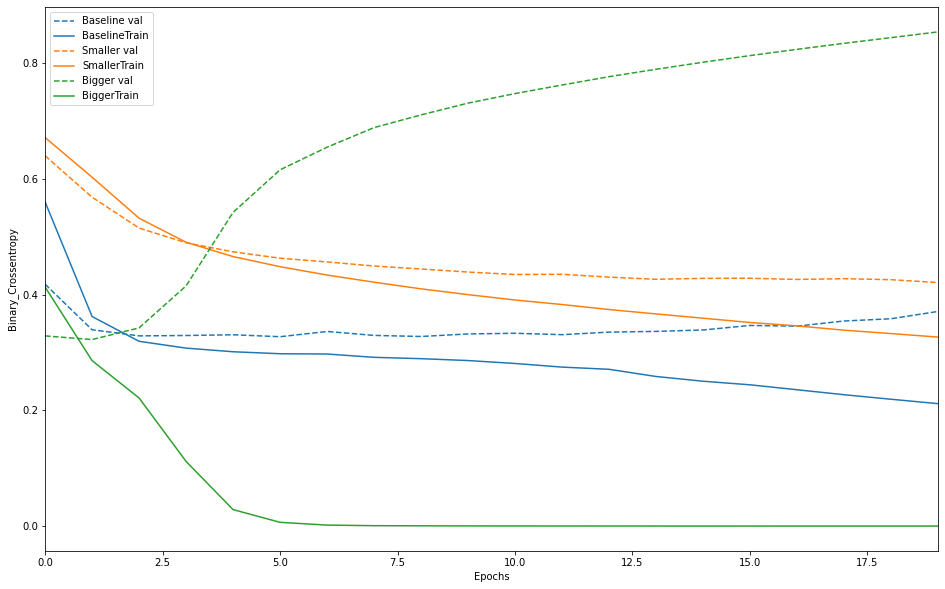

In [18]:
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

### 05. 과대적합을 방지하기 위한 전략

#### 05. 01. 가중치 규제
  - 간단한 모델이 과대적한 되는 경향이 작음
    - 간단한 모델 : 모델 파라미터의 분포를 봤을 때 엔트로피(entropy)가 작은 모델
      - 적은 파라미터를 가진 모델
  - 가중치가 작은 값을 가지도록 복잡도에 제약을 가하는 방법 : 가중치 규제(weight regularization)
    - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
      - L1 norm 추가
      - L1 규제는 일부 가중치 파라미터를 0으로 만듬
    - L2 규제 : 가중치의 제곱에 비례하는 비용 추가
      - L2 norm(제곱) 추가
      - 신경망에서는 L2 규제를 가중치 감쇠(weight decay)라고 부름
      - L2 규제는 가중치 파라미터를 제한하지만 완전히 0으로 만들지는 않음
      - L2 규제를 많이 사용  
        
  - l2(0.001)
    - 가중치 행렬의 모든 값에 0.001 * weight_coefficient_value**2 더해짐
    - 훈련할 때만 추가 : 훈련 단계에서 네트워크 손실이 더 커집니다

In [19]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data,
                               train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

Epoch 1/20
49/49 - 4s - loss: 0.6002 - accuracy: 0.7231 - binary_crossentropy: 0.5584 - val_loss: 0.4605 - val_accuracy: 0.8236 - val_binary_crossentropy: 0.4205
Epoch 2/20
49/49 - 1s - loss: 0.4039 - accuracy: 0.8504 - binary_crossentropy: 0.3639 - val_loss: 0.3833 - val_accuracy: 0.8558 - val_binary_crossentropy: 0.3433
Epoch 3/20
49/49 - 1s - loss: 0.3635 - accuracy: 0.8656 - binary_crossentropy: 0.3237 - val_loss: 0.3699 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3306
Epoch 4/20
49/49 - 1s - loss: 0.3495 - accuracy: 0.8739 - binary_crossentropy: 0.3106 - val_loss: 0.3662 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3282
Epoch 5/20
49/49 - 1s - loss: 0.3456 - accuracy: 0.8722 - binary_crossentropy: 0.3082 - val_loss: 0.3649 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3282
Epoch 6/20
49/49 - 1s - loss: 0.3402 - accuracy: 0.8754 - binary_crossentropy: 0.3040 - val_loss: 0.3643 - val_accuracy: 0.8597 - val_binary_crossentropy: 0.3288
Epoch 7/20
49/49 - 1s - loss

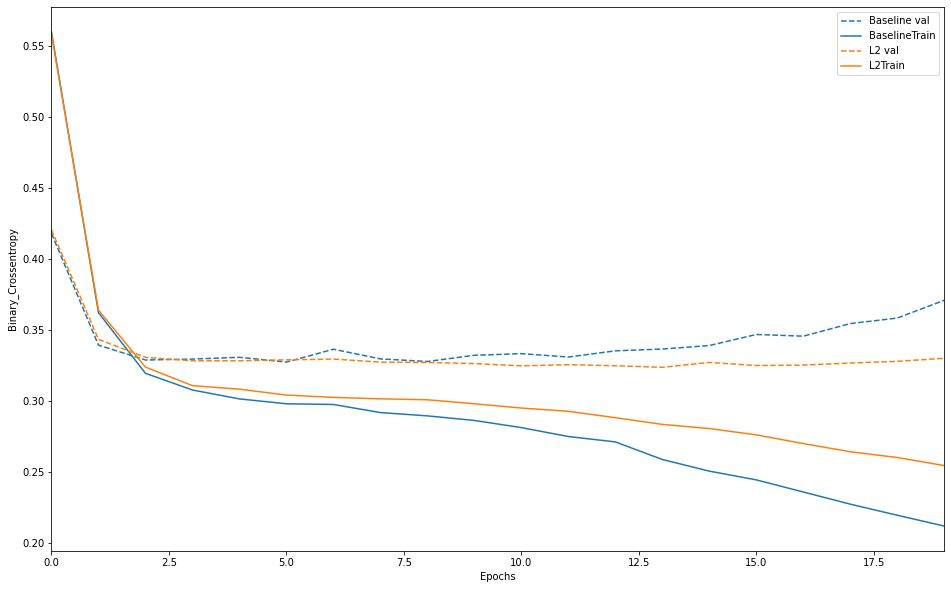

In [20]:
plot_history([('baseline', baseline_history),
             ('l2', l2_model_history)])

#### 05. 02. 드롭아웃 추가하기 : drop out
  - 훈련하는 동안 층의 출력 특성을 랜덤하게 0으로 만듭니다
  - 드롭아웃 비율 : 보등 0.2 ~ 0.5
  - 테스트 단계에서는 어떤 유닛도 드롭아웃하지 않습니다

In [21]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Epoch 1/20
49/49 - 4s - loss: 0.6798 - accuracy: 0.5618 - binary_crossentropy: 0.6798 - val_loss: 0.6189 - val_accuracy: 0.7463 - val_binary_crossentropy: 0.6189
Epoch 2/20
49/49 - 1s - loss: 0.5883 - accuracy: 0.6836 - binary_crossentropy: 0.5883 - val_loss: 0.4676 - val_accuracy: 0.8226 - val_binary_crossentropy: 0.4676
Epoch 3/20
49/49 - 1s - loss: 0.4888 - accuracy: 0.7758 - binary_crossentropy: 0.4888 - val_loss: 0.3802 - val_accuracy: 0.8478 - val_binary_crossentropy: 0.3802
Epoch 4/20
49/49 - 1s - loss: 0.4338 - accuracy: 0.8069 - binary_crossentropy: 0.4338 - val_loss: 0.3501 - val_accuracy: 0.8550 - val_binary_crossentropy: 0.3501
Epoch 5/20
49/49 - 1s - loss: 0.4048 - accuracy: 0.8279 - binary_crossentropy: 0.4048 - val_loss: 0.3306 - val_accuracy: 0.8576 - val_binary_crossentropy: 0.3306
Epoch 6/20
49/49 - 1s - loss: 0.3843 - accuracy: 0.8398 - binary_crossentropy: 0.3843 - val_loss: 0.3253 - val_accuracy: 0.8591 - val_binary_crossentropy: 0.3253
Epoch 7/20
49/49 - 1s - loss

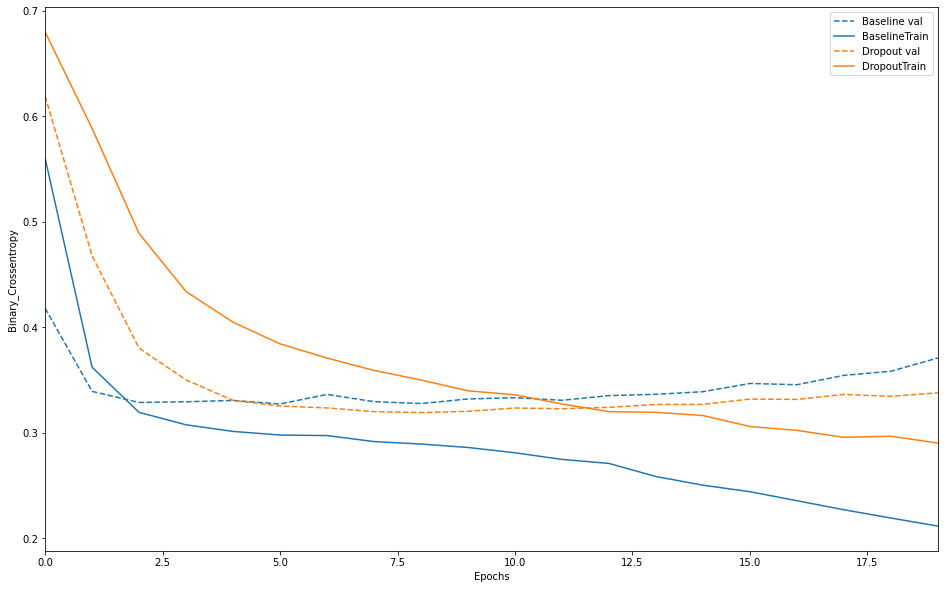

In [23]:
plot_history([('baseline', baseline_history),
             ('dropout', dpt_model_history)])

### 과대적합 줄이기
  - 더 많은 훈련 데이터를 모읍니다
  - 네트워크의 용량을 줄입니다
  - 가중치 규제를 추가합니다
  - 드롭아웃을 추가합니다